# Import requirements and packages

In [106]:
from __future__ import division
import pysam
import glob
import pandas as pd
import numpy as np
import itertools
from collections import Counter
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Read in BAM files and count reads

In [163]:
start=5831
stop=6045

def count_reads_for_gene(start, stop):
    
    hiv_bams = {'filepath':[], 'numberReads':[]}

    for filepath in glob.glob('/Users/greg/Desktop/FullNeuroIllumina/*.bam'):
        samfile = pysam.AlignmentFile(filepath, 'rb')
        numreads = 0
        for read in samfile.fetch('HXB2', start, stop):
            if ~read.is_qcfail:
                numreads+=1
        if 'Frag' not in filepath:
            if numreads >= 1000:
                #print filepath, numreads
                hiv_bams['filepath'].append(filepath)
                hiv_bams['numberReads'].append(numreads)

    hivBAM_df = pd.DataFrame(hiv_bams)
    return hivBAM_df

In [166]:
tat1_df = count_reads_for_gene(5831, 6045)
print tat1_df.shape

tat2_df = count_reads_for_gene(8380, 8469)
print tat2_df.shape

(52, 2)
(54, 2)


In [167]:
tat1_df.head()

,filepath,numberReads
0,/Users/greg/Desktop/FullNeuroIllumina/A0001-R0...,114761
1,/Users/greg/Desktop/FullNeuroIllumina/A0013-R0...,2382
2,/Users/greg/Desktop/FullNeuroIllumina/A0019-R1...,3913
3,/Users/greg/Desktop/FullNeuroIllumina/A0034-R0...,20365
4,/Users/greg/Desktop/FullNeuroIllumina/A0044-R1...,2023


In [262]:
tat2_df

,filepath,numberReads
0,/Users/greg/Desktop/FullNeuroIllumina/A0001-R0...,53547
1,/Users/greg/Desktop/FullNeuroIllumina/A0002-R1...,36828
2,/Users/greg/Desktop/FullNeuroIllumina/A0004-R1...,17095
3,/Users/greg/Desktop/FullNeuroIllumina/A0010-R0...,3557
4,/Users/greg/Desktop/FullNeuroIllumina/A0013-R0...,19652
5,/Users/greg/Desktop/FullNeuroIllumina/A0019-R1...,9677
6,/Users/greg/Desktop/FullNeuroIllumina/A0026-R0...,7531
7,/Users/greg/Desktop/FullNeuroIllumina/A0032-R0...,42069
8,/Users/greg/Desktop/FullNeuroIllumina/A0034-R0...,11333
9,/Users/greg/Desktop/FullNeuroIllumina/A0038-R0...,36008


In [170]:
pd.merge(tat1_df, tat2_df, left_on='filepath', right_on='filepath').head()

,filepath,numberReads_x,numberReads_y
0,/Users/greg/Desktop/FullNeuroIllumina/A0001-R0...,114761,53547
1,/Users/greg/Desktop/FullNeuroIllumina/A0013-R0...,2382,19652
2,/Users/greg/Desktop/FullNeuroIllumina/A0019-R1...,3913,9677
3,/Users/greg/Desktop/FullNeuroIllumina/A0034-R0...,20365,11333
4,/Users/greg/Desktop/FullNeuroIllumina/A0044-R1...,2023,17296


In [11]:
print hivBAM_df.shape
hivBAM_df.head()
hivBAM_df.to_csv('illumina_round1_pass.csv')

(52, 2)


# Pileup each column in alignment

In [12]:
hiv_pileups = {'filepath':[], 'reference':[], 'coverage':[]}

for filepath in list(hivBAM_df['filepath']):
    
    ref_position = []
    pileups = []
    
    samfile = pysam.AlignmentFile(filepath, 'rb')
    for pileupcolumn in samfile.pileup('HXB2', 5831, 6045):
        if pileupcolumn.pos >= 5831 and pileupcolumn.pos <= 6045:
            ref_position.append(pileupcolumn.pos)
            pileups.append(pileupcolumn.n)
    
    hiv_pileups['filepath'].append(filepath)
    hiv_pileups['reference'].append(ref_position)
    hiv_pileups['coverage'].append(pileups)

hivPileup_df = pd.DataFrame(hiv_pileups)

In [17]:
print hivPileup_df.shape
hivPileup_df.head()

(52, 3)


,coverage,filepath,reference
0,"[8102, 7882, 7898, 7871, 7930, 7581, 7794, 781...",/Users/greg/Desktop/FullNeuroIllumina/A0001-R0...,"[5831, 5832, 5833, 5834, 5835, 5836, 5837, 583..."
1,"[746, 744, 746, 752, 747, 747, 750, 760, 758, ...",/Users/greg/Desktop/FullNeuroIllumina/A0013-R0...,"[5831, 5832, 5833, 5834, 5835, 5836, 5837, 583..."
2,"[1543, 1544, 1537, 1542, 1531, 1543, 1557, 155...",/Users/greg/Desktop/FullNeuroIllumina/A0019-R1...,"[5831, 5832, 5833, 5834, 5835, 5836, 5837, 583..."
3,"[8003, 7959, 7970, 7969, 7970, 7892, 7984, 797...",/Users/greg/Desktop/FullNeuroIllumina/A0034-R0...,"[5831, 5832, 5833, 5834, 5835, 5836, 5837, 583..."
4,"[746, 699, 695, 700, 697, 692, 689, 648, 652, ...",/Users/greg/Desktop/FullNeuroIllumina/A0044-R1...,"[5831, 5832, 5833, 5834, 5835, 5836, 5837, 583..."


# Plot coverage

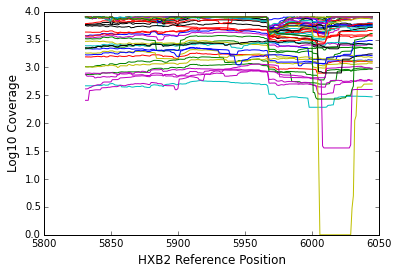

In [14]:
fig, ax = plt.subplots(figsize=(6,4))

for i, row in hivPileup_df.iterrows():
    cov = row.coverage
    ref = row.reference
    ax.plot(ref, np.log10(cov))

ax.set_xlabel('HXB2 Reference Position', size=12)
ax.set_ylabel('Log10 Coverage', size=12)
    
plt.show()

# Translate reads in correct reading frame

In [133]:
#give filepath and start position of desired codon
#returns dictionary or pandas dataframe

def translate_reads(filepath, hxb2_pos):
    '''
    This function translates codons beginning at a given reference position
    for reads contained in the provided bam file
    '''    
    # make alignment file from bam
    samfile = pysam.AlignmentFile(filepath, 'rb')
    # get iterator for reads that map to the provided codon position
    iter_reads = samfile.fetch(reference='HXB2', start=hxb2_pos, end=hxb2_pos+3)
    
    #intialize an empty dictionary
    info_dict = {'HXB2position':[], 'codon':[], 'aminoacid':[]}
    
    #iterate through the reads
    for read in iter_reads:
        
        # get the read sequence
        read_sequence = read.query_alignment_sequence
        # get the array of the reference positions corresponding to the sequence
        position_array = np.array(read.get_reference_positions())
        
        # get a boolean index of the codon of interest contained in the read
        a = position_array >= hxb2_pos
        b = position_array < hxb2_pos+3
        idx = a*b      
        
        # only consider complete codons
        if sum(idx) > 2:

            # get the reference positions for the codon
            reference_positions = position_array[idx]
            info_dict['HXB2position'].append(reference_positions[0])
            
            # trim the read to only contain the codon of interest and translate
            trimmed_sequence = ''.join(list(itertools.compress(read_sequence, idx)))
            coding_dna = Seq(trimmed_sequence, generic_dna)
            aminoacid = coding_dna.translate()
            info_dict['codon'].append(coding_dna)
            info_dict['aminoacid'].append(aminoacid)
            
    df = pd.DataFrame(info_dict)
    return df

In [ ]:
def translate_patient_bam(filepath, gene_start, gene_end):
    df = pd.DataFrame()
    for pos in range(tat1_start, tat1_end, 3):
        n += 1 
        codon_df = translate_reads(filepath, pos)
        codon_df['AApos'] = n
        #print n, pos, codon_df.shape
        df = df.append(codon_df, ignore_index=True)

    elapsed = time.time() - t
    print elapsed

    print df.shape
    df
    return 

# Testing on one BAM file

In [244]:
filepath = list(hivBAM_df['filepath'])[0]
sample = filepath.split('/')[-1].split('.')[0]
print sample

tat1_start = 5830
tat1_end = 6046

t = time.time()
n = 0
df = pd.DataFrame()
for pos in range(tat1_start, tat1_end, 3):
    n += 1 
    codon_df = translate_reads(filepath, pos)
    codon_df['AApos'] = n
    #print n, pos, codon_df.shape
    df = df.append(codon_df, ignore_index=True)
         
elapsed = time.time() - t
print elapsed
    
print df.shape
df

A0001-R09
835.752208948
(2682817, 4)


,HXB2position,aminoacid,codon,AApos
0,5830,(M),"(A, T, G)",1
1,5830,(M),"(A, T, G)",1
2,5830,(M),"(A, T, G)",1
3,5830,(M),"(A, T, G)",1
4,5830,(M),"(A, T, G)",1
5,5830,(M),"(A, T, G)",1
6,5830,(M),"(A, T, G)",1
7,5830,(M),"(A, T, G)",1
8,5830,(M),"(A, T, G)",1
9,5830,(M),"(A, T, G)",1


In [246]:
print codon_df.head()
total = codon_df.shape[0]
c = Counter(codon_df['aminoacid'])
pos = codon_df['HXB2position'][0]

d = {'HXB2position':[], 'aminoacid':[], 'total':[], 'frequency':[], 'percentage':[]}

for aminoacid in c:
    freq = c[aminoacid]
    d['HXB2position'].append(pos)
    d['aminoacid'].append(aminoacid)
    d['frequency'].append(freq)
    d['total'].append(total)
    d['percentage'].append(round(freq/total, 4))
    
    #print ''
pd.DataFrame(d)

   HXB2position aminoacid      codon  AApos
0          6043       (Q)  (C, A, G)     72
1          6043       (Q)  (C, A, G)     72
2          6043       (Q)  (C, A, G)     72
3          6043       (Q)  (C, A, G)     72
4          6043       (Q)  (C, A, G)     72


,HXB2position,aminoacid,frequency,percentage,total
0,6043,(A),5,0.0001,39680
1,6043,(E),25,0.0006,39680
2,6043,(H),105,0.0026,39680
3,6043,(K),55,0.0014,39680
4,6043,(*),3,0.0001,39680
5,6043,(L),46,0.0012,39680
6,6043,(N),2,0.0001,39680
7,6043,(Q),39407,0.9931,39680
8,6043,(P),18,0.0005,39680
9,6043,(S),7,0.0002,39680


# Algorithm 2

In [176]:
filepath = list(hivBAM_df['filepath'])[0]
print filepath
tat1_start = 5830
tat1_end = 6046
print tat1_start, tat1_end
print ''

# make alignment file from bam
samfile = pysam.AlignmentFile(filepath, 'rb')
# get iterator for reads that map to the provided codon position
iter_reads = samfile.fetch(reference='HXB2', start=tat1_start, end=tat1_end)

#initialize dictionary
#read_dictionary = {}

n = 0
for read in iter_reads:
    n+=1
    # get the read sequence
    read_sequence = read.query_alignment_sequence
    # get the array of the reference positions corresponding to the sequence
    position_array = np.array(read.get_reference_positions())
    if n < 4:
        print read_sequence
        print position_array
        print ''

/Users/greg/Desktop/FullNeuroIllumina/A0001-R09.hivsorted.bam
5830 6046

ACTTAGGGCAATATATCTATGAAACTTATGGGGATACTTGGGCAGGAGTGGAGGCCATAATAAGAATTCTGCAACAACTGCTGTTTATTCATTTCAGAATTGGGTGTCAACATAGCAGAATAGGCATTATGCGACAGAGGAGAGCAAGAAA
[5679 5680 5681 5682 5683 5684 5685 5686 5687 5688 5689 5690 5691 5692 5693
 5694 5695 5696 5697 5698 5699 5700 5701 5702 5703 5704 5705 5706 5707 5708
 5709 5710 5711 5712 5713 5714 5715 5716 5717 5718 5719 5720 5721 5722 5723
 5724 5725 5726 5727 5728 5729 5730 5731 5732 5733 5734 5735 5736 5737 5738
 5739 5740 5741 5742 5743 5744 5745 5746 5747 5748 5749 5750 5751 5752 5753
 5754 5755 5756 5757 5758 5759 5760 5761 5762 5763 5764 5765 5766 5767 5768
 5769 5771 5772 5773 5774 5775 5776 5777 5778 5779 5780 5781 5782 5783 5784
 5785 5786 5787 5788 5789 5790 5791 5792 5793 5794 5795 5796 5797 5798 5799
 5800 5801 5802 5803 5804 5805 5806 5807 5808 5809 5810 5811 5812 5813 5814
 5815 5816 5817 5818 5819 5820 5821 5822 5823 5824 5825 5826 5827 5828 5829
 5830]

ACTTAGG

In [239]:
#tat 2 indexes = (8380, 8469)
# 6048 for example start

example_seq = read_sequence
example_array = position_array

idx1 = 6046
idx2 = 6800

codon_starts = []
for S in range(idx1, idx2):
    print S, S - 6048, (S-6048)%3
    if (S-6048)%3:
        codon_starts.append(S)

print example_seq
print example_array
print ''

print 'IDX1:',idx1
print 'IDX2:',idx2
print ''

if (idx1 in example_array) and (idx2 in example_array):
    print('BOTH IN BOUNDS')
    a_tuple = np.where(example_array == idx1)
    b_tuple = np.where(example_array == idx2)
    a = a_tuple[0][0]
    b = b_tuple[0][0]
elif (idx1 in example_array) and (idx2 not in example_array):
    print('IDX2 OUT OF BOUNDS')
    a_tuple = np.where(example_array == idx1)
    a = a_tuple[0][0]
    b = len(example_array)  
elif (idx1 not in example_array) and (idx2 in example_array):
    print('IDX1 OUT OF BOUNDS')
    a = 0
    b_tuple = np.where(example_array == idx1)
    b = b_tuple[0][0]   
else:
    print('OUT OF BOUNDS')
    a = 0
    b = len(example_array)
    
print a
print b
print ''

new_seq = example_seq[a:b]
new_array = example_array[a:b]
print new_seq
print new_array

6046 -2 1
6047 -1 2
6048 0 0
6049 1 1
6050 2 2
6051 3 0
6052 4 1
6053 5 2
6054 6 0
6055 7 1
6056 8 2
6057 9 0
6058 10 1
6059 11 2
6060 12 0
6061 13 1
6062 14 2
6063 15 0
6064 16 1
6065 17 2
6066 18 0
6067 19 1
6068 20 2
6069 21 0
6070 22 1
6071 23 2
6072 24 0
6073 25 1
6074 26 2
6075 27 0
6076 28 1
6077 29 2
6078 30 0
6079 31 1
6080 32 2
6081 33 0
6082 34 1
6083 35 2
6084 36 0
6085 37 1
6086 38 2
6087 39 0
6088 40 1
6089 41 2
6090 42 0
6091 43 1
6092 44 2
6093 45 0
6094 46 1
6095 47 2
6096 48 0
6097 49 1
6098 50 2
6099 51 0
6100 52 1
6101 53 2
6102 54 0
6103 55 1
6104 56 2
6105 57 0
6106 58 1
6107 59 2
6108 60 0
6109 61 1
6110 62 2
6111 63 0
6112 64 1
6113 65 2
6114 66 0
6115 67 1
6116 68 2
6117 69 0
6118 70 1
6119 71 2
6120 72 0
6121 73 1
6122 74 2
6123 75 0
6124 76 1
6125 77 2
6126 78 0
6127 79 1
6128 80 2
6129 81 0
6130 82 1
6131 83 2
6132 84 0
6133 85 1
6134 86 2
6135 87 0
6136 88 1
6137 89 2
6138 90 0
6139 91 1
6140 92 2
6141 93 0
6142 94 1
6143 95 2
6144 96 0
6145 97 1
6146 98 2


# Will's Code

In [263]:
import sys
sys.path.append('/Users/greg/damlarces/damlarces/NGSTools')
import ReadTools

In [267]:
filepath = list(hivBAM_df['filepath'])[0]
print filepath

samfile = pysam.AlignmentFile(filepath, 'rb')
iter_reads = samfile.fetch(reference='HXB2', start=5830, end=6045)

tatorf = [('Tat1', 5831, 6045)]

goodcount=0
errorcount=0
for read in iter_reads:
    try:
        goodcount+=1
        readrecord = ReadTools.SeqReadRecord.from_pysam(read)
        for orf in readrecord.translate(tatorf):
            x = str(orf.seq)            
    except:
        errorcount+=1
        continue
        
print goodcount
print errorcount

/Users/greg/Desktop/FullNeuroIllumina/A0001-R09.hivsorted.bam
115126
73201
